# Python Programming Session 6

# Writing Functions

- Break programs down into functions to make them easier to understand.
- Human beings can only keep a few items in working memory at a time.
- Understand larger/more complicated ideas by understanding and combining pieces.
- Encapsulate complexity so that we can treat it as a single “thing”.
- Also enables re-use.


*Define a function using def with a name, parameters, and a block of code.*



For this session, put the inflammation*.csv data in your working directory.


In [ ]:
# Import libraries
import glob
import numpy
import matplotlib
import matplotlib.pyplot

In [1]:
def print_greeting():
    print('Hello!')


Defining a function does not run it.

In [2]:
print_greeting()

Hello!


Arguments in call are matched to parameters in definition.

In [4]:
def print_date(year, month, day):
    joined = str(year) + '/' + str(month) + '/' + str(day)
    print(joined)


In [5]:

print_date(1871, 3, 19)

1871/3/19


Or, we can name the arguments when we call the function, which allows us to specify them in any order:



In [6]:
print_date(month=3, day=19, year=1871)

1871/3/19


Functions may return a result (a value) to their caller using return.

In [7]:
def average(values):
    if len(values) == 0:
        return None
    return sum(values) / len(values)

In [8]:
a = average([1, 3, 4])
print('average of actual values:', a)

average of actual values: 2.6666666666666665


Remember: every function returns something.
A function that doesn’t explicitly return a value automatically returns None.

In [9]:
print('average of empty list:', average([]))

average of empty list: None


In [10]:
result = print_date(1871, 3, 19)
print('result of call is:', result)

1871/3/19
result of call is: None


### Question 1.  What is the error here?

In [11]:
def another_function
  print("Syntax errors are annoying.")
   print("But at least python tells us about them!")
  print("So they are usually not too hard to fix.")

SyntaxError: invalid syntax (<ipython-input-11-35c8a2d5a2ea>, line 1)

### Question 2.  What does this code return?

In [13]:
def report(pressure):
    print('pressure is', pressure)

print('calling', report, 22.5)

calling <function report at 0x10b692d40> 22.5



### Question 3. Does order of operations matter?

In [15]:
fahr_to_celsius(32)

def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))

NameError: name 'fahr_to_celsius' is not defined

In [16]:
print('freezing point of water:', fahr_to_celsius(32), 'C')
print('boiling point of water:', fahr_to_celsius(212), 'C')


NameError: name 'fahr_to_celsius' is not defined

## Composing Functions

Now that we’ve seen how to turn Fahrenheit into Celsius, we can also write the function to turn Celsius into Kelvin:

In [19]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print('freezing point of water in Kelvin:', celsius_to_kelvin(0.))

freezing point of water in Kelvin: 273.15


What about converting Fahrenheit to Kelvin? We could write out the formula, but we don’t need to. Instead, we can compose the two functions we have already created:

In [20]:
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))

NameError: name 'fahr_to_celsius' is not defined

This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-larger chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

## Functions for tidying up code

Now that we know how to wrap bits of code up in functions, we can make our inflammation analysis easier to read and easier to reuse. First, let’s make a visualize function that generates our plots:

In [32]:
def visualize(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

Rather than jumbling this code together in one giant for loop, we can now read and reuse with a simple for loop:

inflammation-01.csv


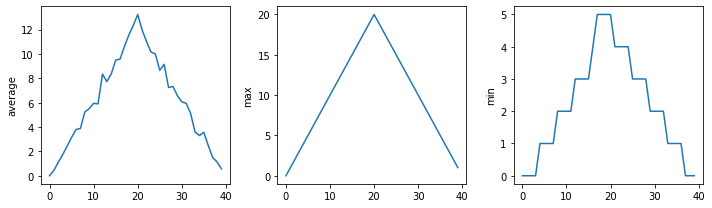

inflammation-02.csv


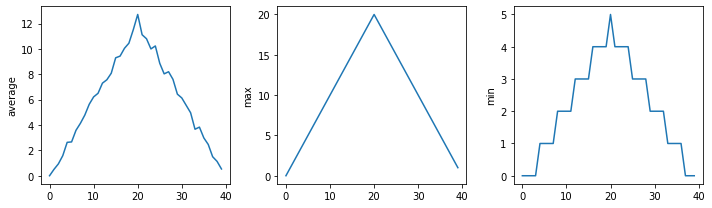

inflammation-03.csv


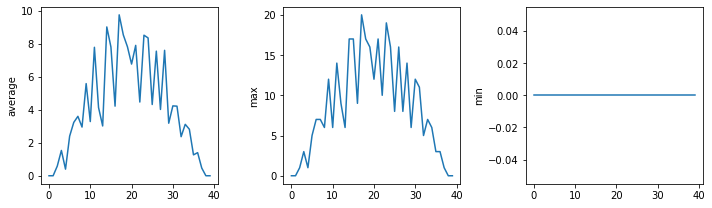

In [39]:
filenames = sorted(glob.glob('inflammation*.csv'))

for filename in filenames[:3]:
    print(filename)
    visualize(filename)

### Add documentation to your functions

If the first thing in a function is a string that isn’t assigned to a variable, that string is attached to the function as its documentation.  This is called a *docstring* and is in triple quotes.



In [25]:
def offset_mean(data, target_mean_value):
    """Return a new array containing the original data
       with its mean offset to match the desired value."""
    return (data - numpy.mean(data)) + target_mean_value

In [27]:
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data
    with its mean offset to match the desired value.



## Readable Functions

### Question 4:  Which one of these is more readable - s or std_dev? Why?

In [29]:
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))



def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))

### [Take a minute to share some feedback.](https://forms.gle/xiappXj4QhPKoXeLA)


#### References
This lesson is developed from the following resources:
- http://swcarpentry.github.io/python-novice-gapminder/16-writing-functions/index.html
- https://swcarpentry.github.io/python-novice-inflammation/08-func/index.html